<a href="https://colab.research.google.com/github/haticeaxu/ai-models-collection/blob/main/DIP_MIDTERM_Image_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIDTERM

## VERI YUKLEME

[ChestX-ray8 dataset](https://arxiv.org/abs/1705.02315)
<img src="https://raw.githubusercontent.com/hardik0/AI-for-Medicine-Specialization/master/AI-for-Medical-Diagnosis/Week-1/xray-image.png" alt="U-net Image" width="300" align="middle"/>



In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()

In [ ]:
!git clone https://github.com/hardik0/AI-for-Medicine-Specialization
%cd AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/

Cloning into 'AI-for-Medicine-Specialization'...
remote: Enumerating objects: 1601, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1601 (delta 9), reused 2 (delta 0), pack-reused 1573 (from 1)
Receiving objects: 100% (1601/1601), 720.36 MiB | 24.86 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (1497/1497), done.
/content/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis


In [ ]:
%ls nih/

densenet.hdf5  images_small/  pretrained_model.h5  test.csv  train-small.csv  valid-small.csv


In [ ]:
# Read csv file containing training datadata
train_df = pd.read_csv("nih/train-small.csv")
# Print first 5 rows
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head()

There are 1000 rows and 16 columns in this data frame


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


Have a look at the various columns in this csv file. The file contains the names of chest x-ray images ("Image" column) and the columns filled with ones and zeros identify which diagnoses were given based on each x-ray image.

### Data types and null values check
Run the next cell to explore the data types present in each column and whether any null values exist in the data.

In [ ]:
# Look at the data type of each column and whether null values are present
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

### Unique IDs check
"PatientId" has an identification number for each patient. One thing you'd like to know about a medical dataset like this is if you're looking at repeated data for certain patients or whether each image represents a different person.

In [ ]:
print(f"The total patient ids are {train_df['PatientId'].count()}, from those the unique ids are {train_df['PatientId'].value_counts().shape[0]} ")

The total patient ids are 1000, from those the unique ids are 928 


As you can see, the number of unique patients in the dataset is less than the total number so there must be some overlap. For patients with multiple records, you'll want to make sure they do not show up in both training and test sets in order to avoid data leakage (covered later in this week's lectures).

### Explore data labels
Run the next two code cells to create a list of the names of each patient condition or disease.

In [ ]:
columns = train_df.keys()
columns = list(columns)
print(columns)

['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [ ]:
# Remove unnecesary elements
columns.remove('Image')
columns.remove('PatientId')
# Get the total classes
print(f"There are {len(columns)} columns of labels for these conditions: {columns}")

There are 14 columns of labels for these conditions: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


Run the next cell to print out the number of positive labels (1's) for each condition

In [ ]:
# Print out the number of positive labels for each class
for column in columns:
    print(f"The class {column} has {train_df[column].sum()} samples")

The class Atelectasis has 106 samples
The class Cardiomegaly has 20 samples
The class Consolidation has 33 samples
The class Edema has 16 samples
The class Effusion has 128 samples
The class Emphysema has 13 samples
The class Fibrosis has 14 samples
The class Hernia has 2 samples
The class Infiltration has 175 samples
The class Mass has 45 samples
The class Nodule has 54 samples
The class Pleural_Thickening has 21 samples
The class Pneumonia has 10 samples
The class Pneumothorax has 38 samples


Have a look at the counts for the labels in each class above. Does this look like a balanced dataset?

### Data Visualization
Using the image names listed in the csv file, you can retrieve the image associated with each row of data in your dataframe.

Run the cell below to visualize a random selection of images from the dataset.

Display Random Images


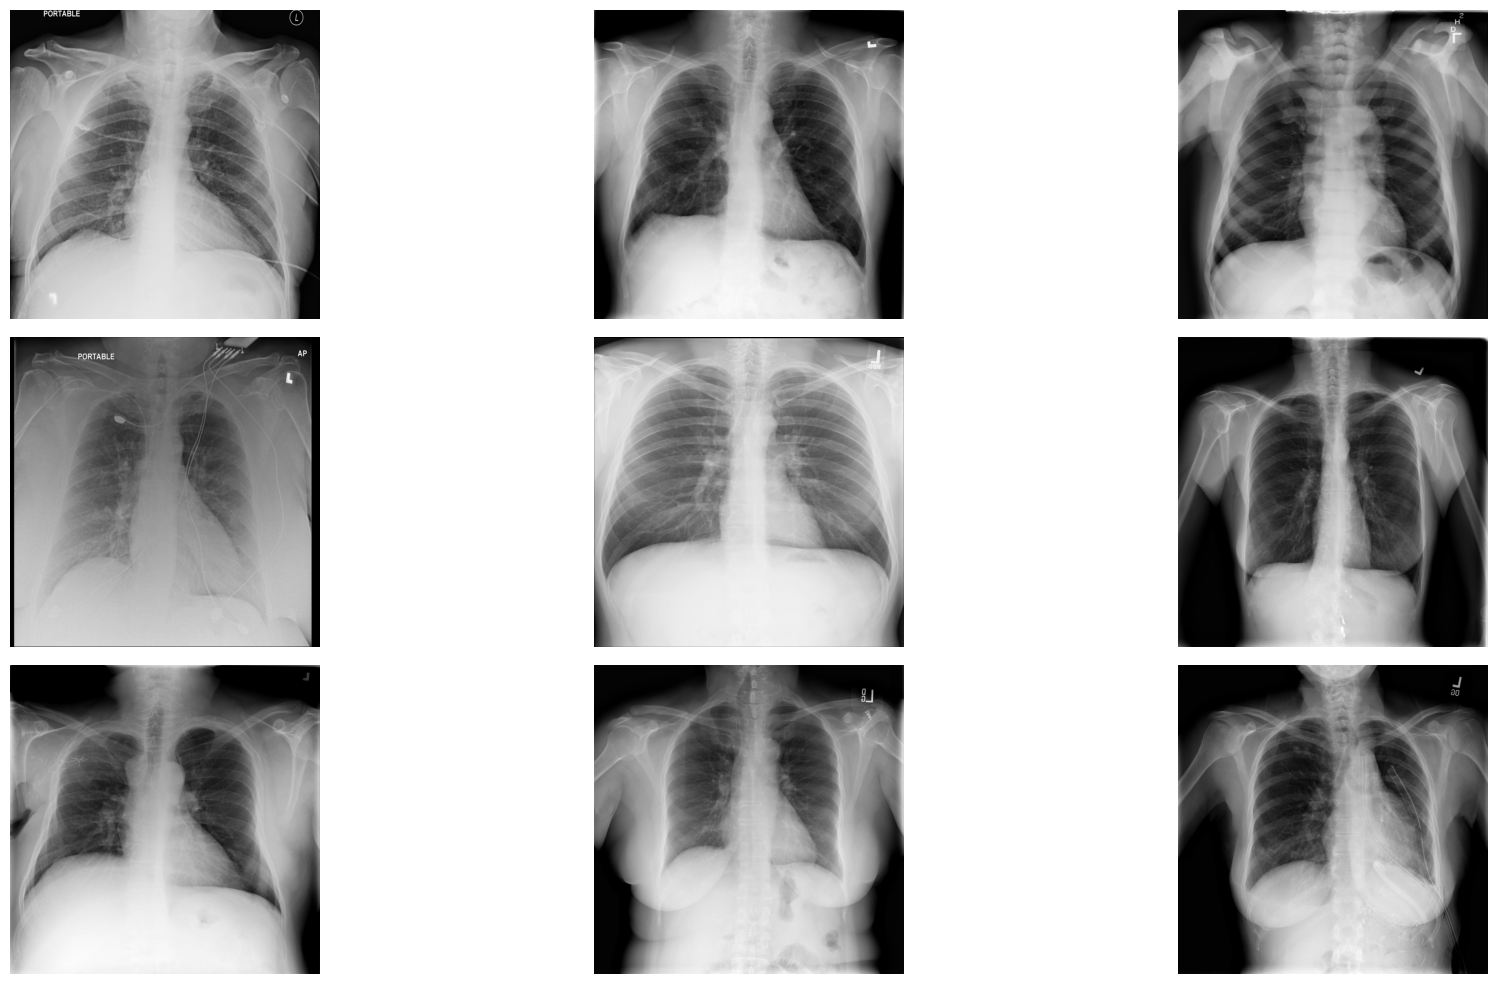

In [ ]:
# Extract numpy values from Image column in data frame
images = train_df['Image'].values

# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

# Location of the image dir
img_dir = 'nih/images_small/'

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

# Adjust subplot parameters to give specified padding
plt.tight_layout()

** RASTGELE SECİLMİŞ 9 GÖRÜNTÜNÜN ISTATISTIKSEL ÖZELLİKLERİNİ (MAKSIMUM, MINIMUM, MEAN VE STD) HESAPLAYIN. ORNEK OLARAK BIR GORUNTU ICIN HESAPLAMA YAPILMISTIR

The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 0.9804 and the minimum is 0.0000
The mean value of the pixels is 0.4796 and the standard deviation is 0.2757


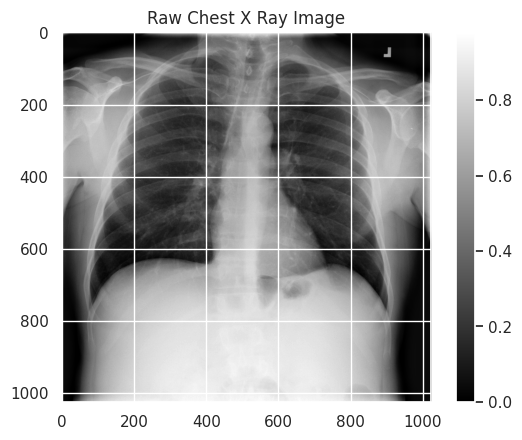

In [ ]:
sample_img = train_df.Image[0]
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

RASTGELE SECILMIS 9 GORUNTUNUN HISTOGRAMINI CIZDIRIN. ORNEK OLARAK BIR GORUNTU ICIN VERILMISTIR.

<ipython-input-23-5170b570a150>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(),


Text(0, 0.5, '# Pixels in Image')

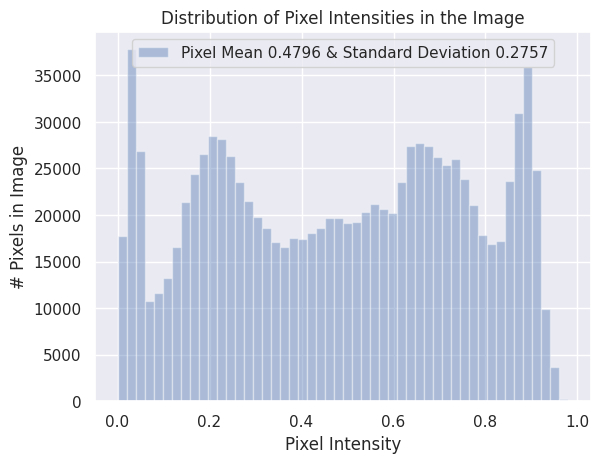

In [ ]:
sns.distplot(raw_image.ravel(),
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

GORUNTULERE CONTRAST STRECTCHING YAPINIZ, CONTRAST STRECTCHING GORUNTULERINE GAMMA TRANSFORMATIONU UYGULAYINIZ. ORNEK OLARAK BIR GORUNTU ICIN VERILMISTIR

In [ ]:
pip install numpy


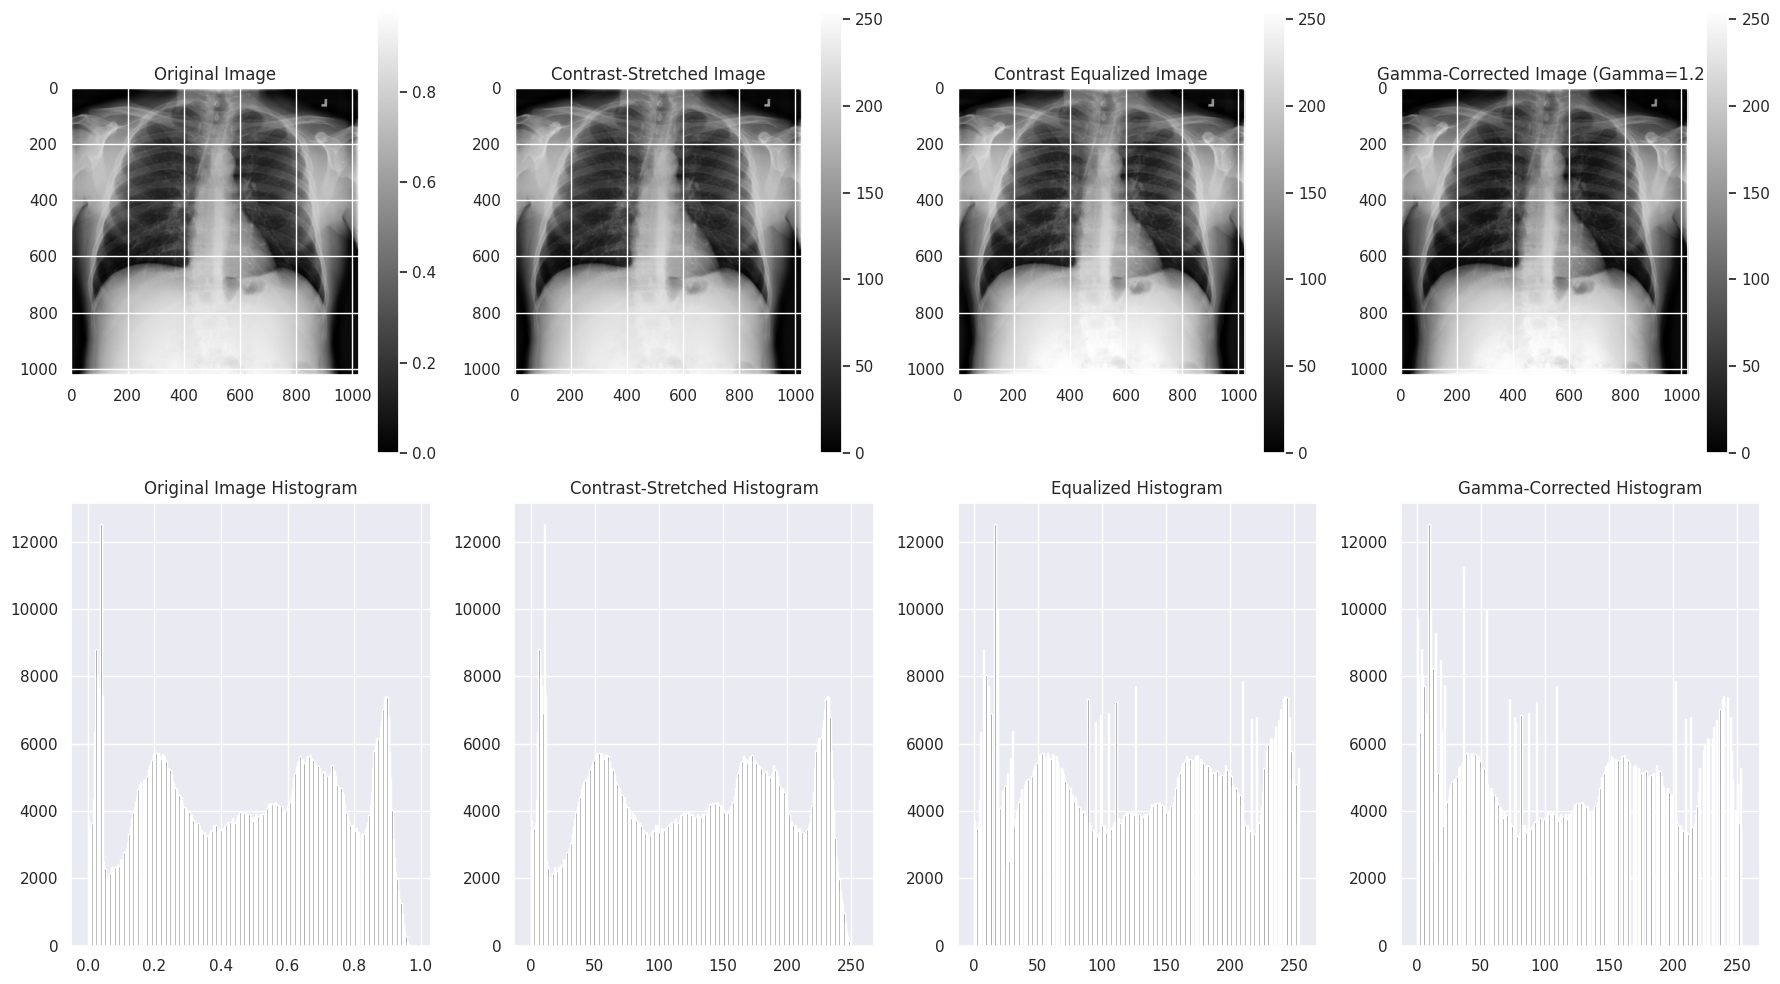

In [ ]:
from skimage import exposure

# Calculate minimum and maximum for contrast stretching
min_val, max_val = raw_image.min(), raw_image.max()

# Step 1: Apply contrast stretching
min_val, max_val = raw_image.min(), raw_image.max()
contrast_stretched = (raw_image - min_val) / (max_val - min_val)  # Normalize to [0, 1]
contrast_stretched = (contrast_stretched * 255).astype(np.uint8)  # Scale to [0, 255] for visualization

# Step 2: Apply histogram equalization after contrast stretching
# Step 2: Apply histogram equalization using skimage
equalized_image = exposure.equalize_hist(contrast_stretched)  # Returns values in [0, 1]
equalized_image = (equalized_image * 255).astype(np.uint8)    # Scale to [0, 255]


# Step 3: Apply gamma correction on the equalized image
gamma = 1.2  # Adjust gamma value as needed
gamma_corrected = np.power(equalized_image / 255.0, gamma) * 255
gamma_corrected = gamma_corrected.astype(np.uint8)

# Plot original image and histogram
plt.figure(figsize=(18, 10))
plt.subplot(2, 4, 1)
plt.imshow(raw_image, cmap='gray')
plt.title('Original Image')
plt.colorbar()
plt.subplot(2, 4, 5)
plt.hist(raw_image.ravel(), bins=256, color='gray')
plt.title("Original Image Histogram")

# Plot contrast-stretched image and histogram
plt.subplot(2, 4, 2)
plt.imshow(contrast_stretched, cmap='gray')
plt.title('Contrast-Stretched Image')
plt.colorbar()
plt.subplot(2, 4, 6)
plt.hist(contrast_stretched.ravel(), bins=256, color='gray')
plt.title("Contrast-Stretched Histogram")

# Plot contrast-equalized image and histogram
plt.subplot(2, 4, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Contrast Equalized Image')
plt.colorbar()
plt.subplot(2, 4, 7)
plt.hist(equalized_image.ravel(), bins=256, color='gray')
plt.title("Equalized Histogram")

# Plot gamma-corrected image and histogram
plt.subplot(2, 4, 4)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f'Gamma-Corrected Image (Gamma={gamma})')
plt.colorbar()
plt.subplot(2, 4, 8)
plt.hist(gamma_corrected.ravel(), bins=256, color='gray')
plt.title("Gamma-Corrected Histogram")

plt.tight_layout()
plt.show()

<ipython-input-34-cb9e466053e8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gamma_corrected.ravel(),


Text(0, 0.5, '# Pixels in Image')

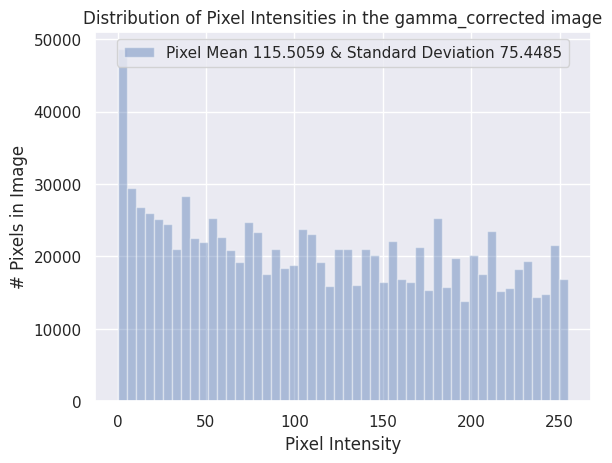

In [ ]:
# Plot a histogram of the distribution of the pixels
sns.distplot(gamma_corrected.ravel(),
             label=f'Pixel Mean {np.mean(gamma_corrected):.4f} & Standard Deviation {np.std(gamma_corrected):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the gamma_corrected image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

TUM GORUNTULERE EMDIAN VE GAUSSIAN BLUR UYGULAYIN

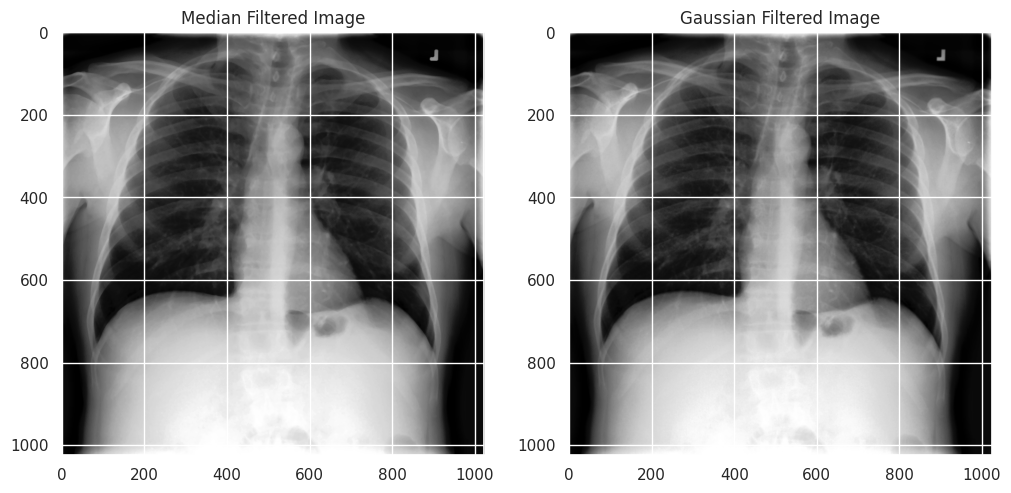

In [ ]:
import cv2  # opencv for python package

# Apply Median Filtering
median_filtered = cv2.medianBlur(gamma_corrected, 5)

# Apply Gaussian Blur
gaussian_filtered = cv2.GaussianBlur(gamma_corrected, (5, 5), 0)

# Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(median_filtered, cmap='gray'), plt.title("Median Filtered Image")
plt.subplot(1, 2, 2), plt.imshow(gaussian_filtered, cmap='gray'), plt.title("Gaussian Filtered Image")
plt.show()


DERECESI RASTGELE 0 ILA 10 ARASINDA OLACAK SEKILDE ROTATION UYGULAYIN GORUNTUYE FLIPPING UYGULAYIN

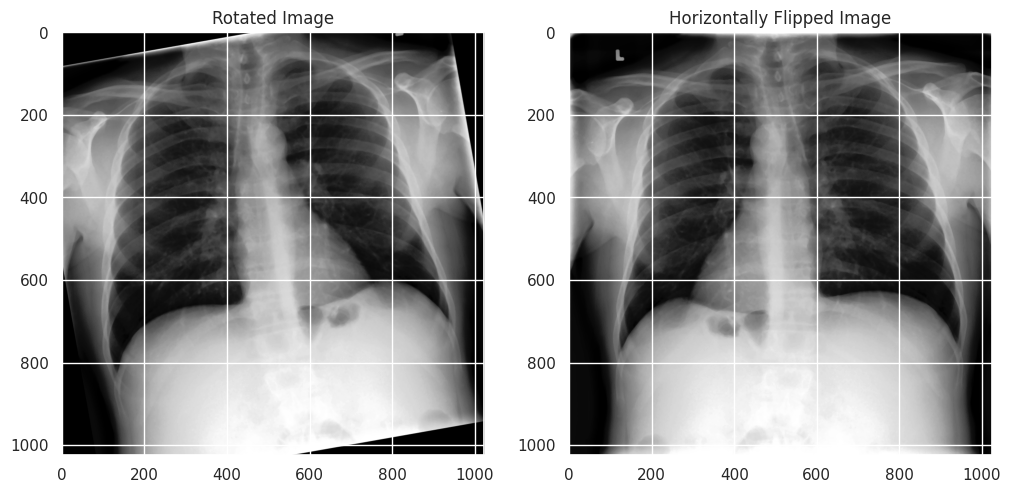

In [ ]:
# Example: Rotate the image by 10 degrees
center = (median_filtered.shape[1] // 2, median_filtered.shape[0] // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle=10, scale=1.0)
rotated_image = cv2.warpAffine(median_filtered, rotation_matrix, (median_filtered.shape[1], median_filtered.shape[0]))

# Horizontal Flip
flipped_horizontal = cv2.flip(median_filtered, 1)

# Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(rotated_image, cmap='gray'), plt.title("Rotated Image")
plt.subplot(1, 2, 2), plt.imshow(flipped_horizontal, cmap='gray'), plt.title("Horizontally Flipped Image")
plt.show()


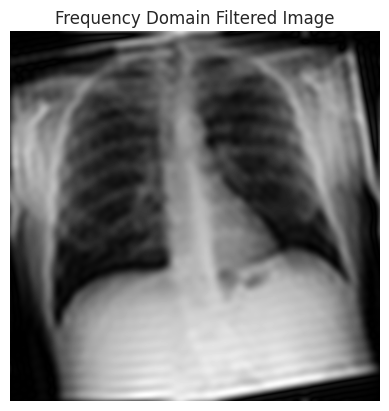

In [ ]:
# Apply Fourier Transform and shift it to center low frequencies
dft = cv2.dft(np.float32(rotated_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Create a mask for filtering
rows, cols = rotated_image.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1  # Center low frequencies pass

# Apply mask and inverse DFT
fshift = dft_shifted * mask
f_ishift = np.fft.ifftshift(fshift)
filtered_image = cv2.idft(f_ishift)
filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

# Normalize and display the filtered image
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(filtered_image, cmap='gray')
plt.title("Frequency Domain Filtered Image")
plt.axis("off")
plt.show()


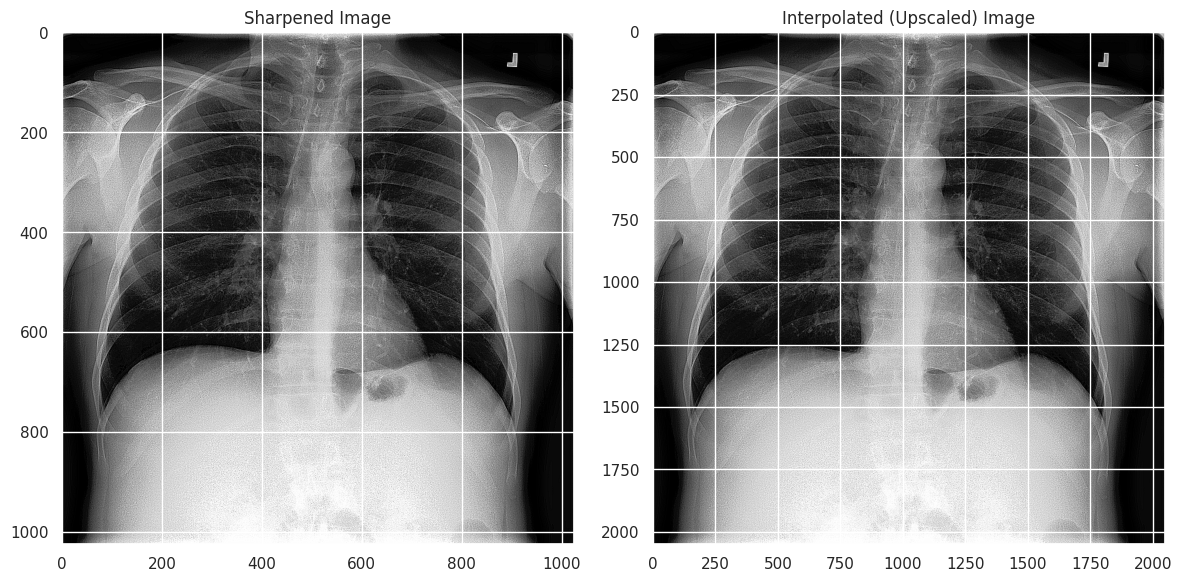

In [ ]:
from scipy.ndimage import zoom

# Step 4: Apply sharpening using an unsharp masking kernel
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])
sharpened_image = np.clip(cv2.filter2D(gamma_corrected, -1, sharpening_kernel), 0, 255).astype(np.uint8)

# Step 5: Apply bicubic interpolation to upscale the image by a factor of 2
scale_factor = 2
resized_image = zoom(sharpened_image, scale_factor, order=3)  # Bicubic interpolation with `order=3`

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(sharpened_image, cmap='gray'),plt.title("Sharpened Image")
plt.subplot(1, 2, 2), plt.imshow(resized_image, cmap='gray'),plt.title("Interpolated (Upscaled) Image")


plt.tight_layout()
plt.show()